In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score, roc_curve, roc_auc_score
from sklearn.metrics import classification_report


In [ ]:
# Set display options for pandas
pd.set_option('display.max_columns', None)

# Load the datasets
df_train = pd.read_csv('/content/train - train.csv')
df_test = pd.read_csv('/content/test - test.csv')

# Check for missing values in the datasets
print(f"Missing values in training data:\n{df_train.isna().sum()}")
print(f"Missing values in test data:\n{df_test.isna().sum()}")

Missing values in training data:
battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               5
four_g           5
int_memory       5
m_dep            5
mobile_wt        4
n_cores          4
pc               5
px_height        4
px_width         2
ram              2
sc_h             1
sc_w             1
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64
Missing values in test data:
id               0
battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
dtype: int64


In [ ]:
df_train.dtypes

,0
battery_power,int64
blue,int64
clock_speed,float64
dual_sim,int64
fc,float64
four_g,float64
int_memory,float64
m_dep,float64
mobile_wt,float64
n_cores,float64


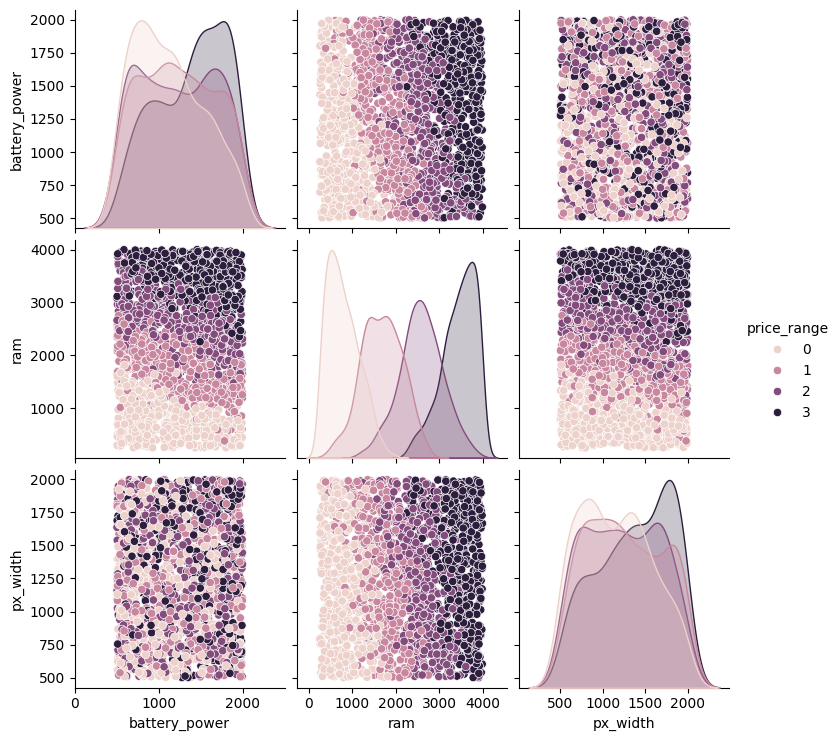

In [ ]:
sns.pairplot(df_train, vars = ['battery_power', 'ram', 'px_width'], hue = 'price_range')
plt.show()

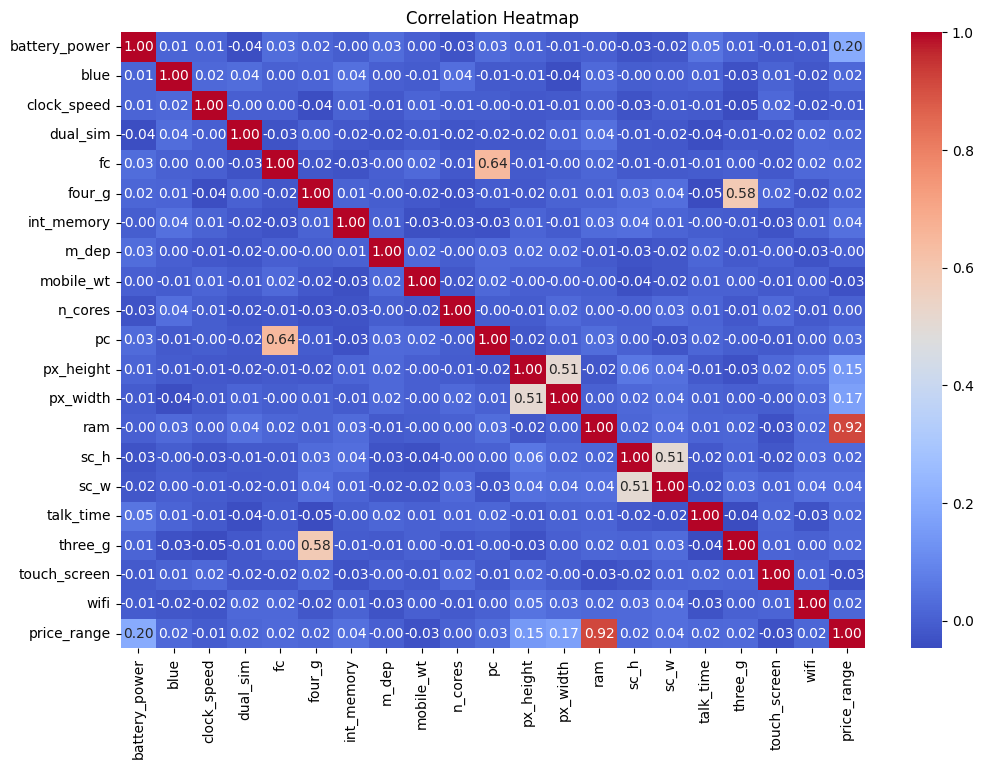

In [ ]:
plt.figure(figsize=(12, 8))  # Adjust figure size
sns.heatmap(df_train.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


<ipython-input-94-82bcf92701f7>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='price_range', data=df_train, palette='viridis')


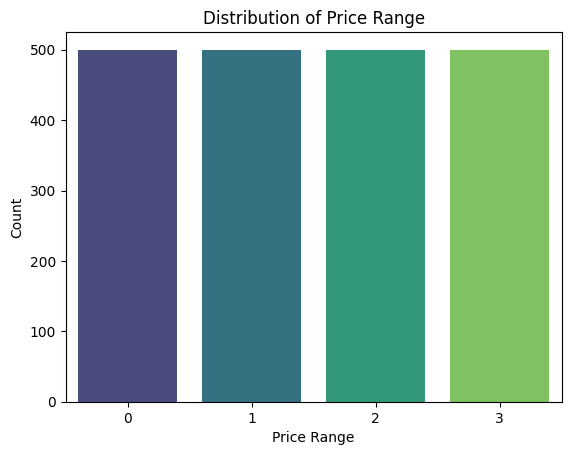

In [ ]:
# Distribution of price_range
sns.countplot(x='price_range', data=df_train, palette='viridis')
plt.title("Distribution of Price Range")
plt.xlabel("Price Range")
plt.ylabel("Count")
plt.show()

<Figure size 1200x1000 with 0 Axes>

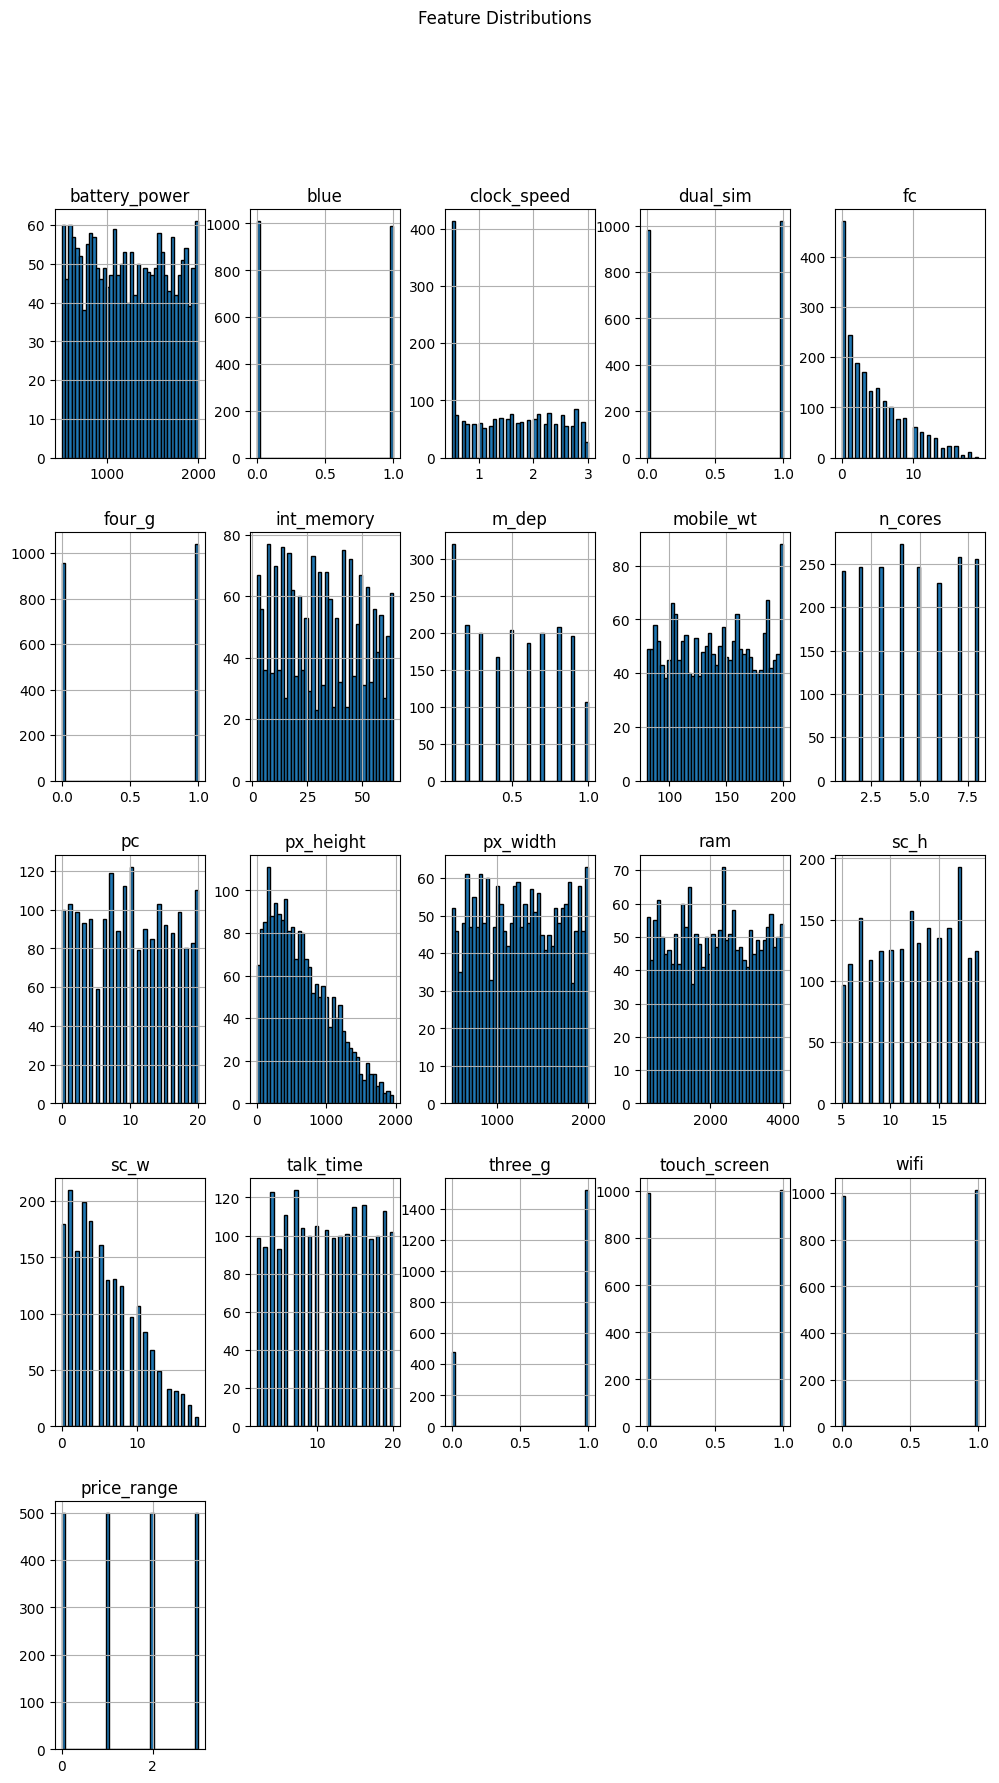

In [ ]:
# Plot feature distributions before modeling
plt.figure(figsize=(12, 10))
df_train.hist(bins=40, figsize=(12, 20), edgecolor='black')
plt.suptitle("Feature Distributions")
plt.show()


In [ ]:
def preprocess_data(df, is_training=True, scaler=None):
    """
    Preprocess the data: handle missing values, scale numerical features,
    and encode categorical features.

    Args:
    - df (pd.DataFrame): The input dataset.
    - is_training (bool): Whether the data is for training or testing.
    - scaler (MinMaxScaler): A scaler object for consistency across train/test.

    Returns:
    - df (pd.DataFrame): The preprocessed dataset.
    - scaler (MinMaxScaler): The scaler used for scaling features.
    """
    # Fill missing values with median
    df.fillna(df.median(), inplace=True)

    # List of continuous features to scale
    continuous_features = ['battery_power', 'clock_speed', 'fc', 'ram', 'mobile_wt',
                           'pc', 'n_cores', 'm_dep', 'int_memory', 'px_height',
                           'px_width', 'sc_h', 'sc_w', 'talk_time']

    # Scale numerical features
    if is_training:
        scaler = MinMaxScaler()
        df[continuous_features] = scaler.fit_transform(df[continuous_features])
    else:
        df[continuous_features] = scaler.transform(df[continuous_features])


    return df, scaler



def evaluate_model(y_true, y_pred, model_name="Model"):
    """
    Evaluate the model using various metrics and display results.

    Args:
    - y_true (array-like): True labels.
    - y_pred (array-like): Predicted labels.
    - model_name (str): Name of the model.
    """
    print(f"=== {model_name} Evaluation ===")
    print(f"Accuracy: {accuracy_score(y_true, y_pred):.2f}")
    print(f"F1 Score (Weighted): {f1_score(y_true, y_pred, average='weighted'):.2f}")
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred))

    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1', '2', '3'], yticklabels=['0', '1', '2', '3'])
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f"{model_name} - Confusion Matrix")
    plt.show()


In [ ]:
# Preprocess the training data
df_train_processed, scaler = preprocess_data(df_train, is_training=True)

# Split data into features (X) and target (y)
X = df_train_processed.drop('price_range', axis=1)  # Features
y = df_train_processed['price_range']  # Target variable

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


=== Logistic Regression Evaluation ===
Accuracy: 0.94
F1 Score (Weighted): 0.94

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       105
           1       0.90      0.93      0.92        91
           2       0.90      0.84      0.87        92
           3       0.95      0.96      0.96       112

    accuracy                           0.94       400
   macro avg       0.93      0.93      0.93       400
weighted avg       0.94      0.94      0.94       400



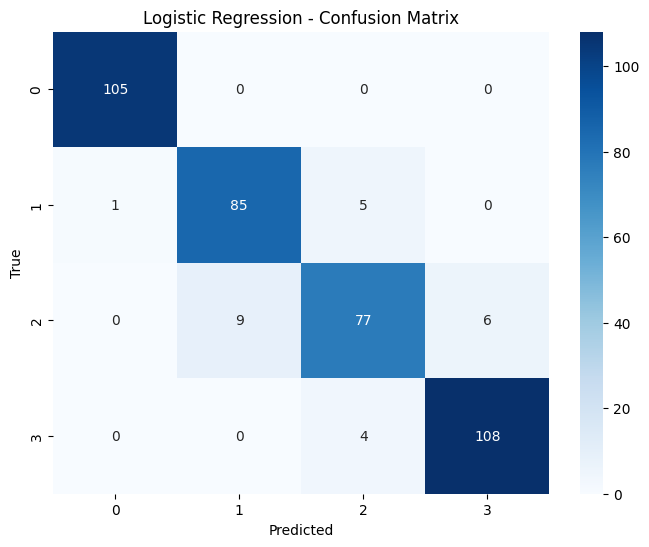

In [ ]:
from sklearn.linear_model import LogisticRegression

# Initialize the model
log_reg = LogisticRegression(max_iter=500, random_state=42)

# Train the model
log_reg.fit(X_train, y_train)

# Make predictions
y_val_pred_lr = log_reg.predict(X_val)

# Evaluate the model
evaluate_model(y_val, y_val_pred_lr, model_name="Logistic Regression")


<ipython-input-99-f57a55040727>:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metrics_df.index, y=metrics_df['accuracy'], palette='viridis')
<ipython-input-99-f57a55040727>:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metrics_df.index, y=metrics_df['f1_weighted'], palette='viridis')


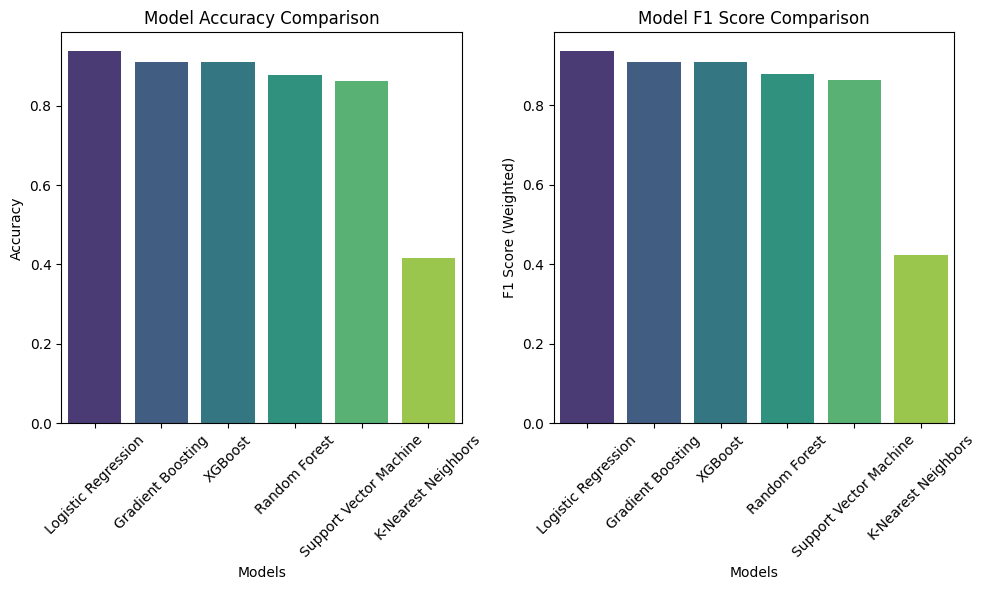

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
'''
# Function to evaluate and store metrics
def evaluate_model(y_true, y_pred, model_name):
    report = classification_report(y_true, y_pred, output_dict=True)
    metrics[model_name] = {
        'accuracy': report['accuracy'],
        'f1_weighted': report['weighted avg']['f1-score'],
        'precision_weighted': report['weighted avg']['precision'],
        'recall_weighted': report['weighted avg']['recall'],
    }

# Initialize a dictionary to store evaluation results
metrics = {}

# Evaluate all models
evaluate_model(y_val, y_val_pred, model_name="Random Forest")
evaluate_model(y_val, y_val_pred_lr, model_name="Logistic Regression")
evaluate_model(y_val, y_val_pred_svm, model_name="Support Vector Machine")
evaluate_model(y_val, y_val_pred_gb, model_name="Gradient Boosting")
evaluate_model(y_val, y_val_pred_xgb, model_name="XGBoost")
evaluate_model(y_val, y_val_pred_knn, model_name="K-Nearest Neighbors")

# Convert the metrics dictionary into a DataFrame for visualization
import pandas as pd
metrics_df = pd.DataFrame(metrics).T  # Transpose to have models as rows
metrics_df = metrics_df.sort_values(by='accuracy', ascending=False)  # Sort models by accuracy

# Plotting the metrics for each model
plt.figure(figsize=(10, 6))

# Plot accuracy
plt.subplot(1, 2, 1)
sns.barplot(x=metrics_df.index, y=metrics_df['accuracy'], palette='viridis')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.xticks(rotation=45)

# Plot F1-Score (Weighted)
plt.subplot(1, 2, 2)
sns.barplot(x=metrics_df.index, y=metrics_df['f1_weighted'], palette='viridis')
plt.xlabel('Models')
plt.ylabel('F1 Score (Weighted)')
plt.title('Model F1 Score Comparison')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()
'''

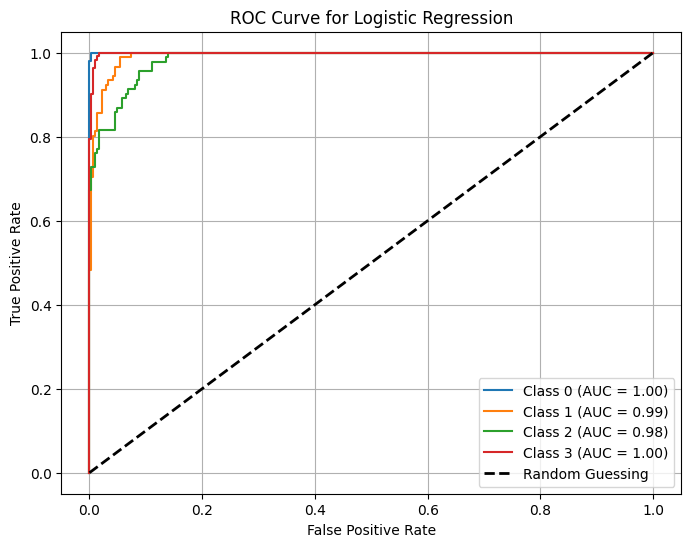

In [ ]:
from sklearn.metrics import roc_curve, auc

# Get the predicted probabilities for the positive class (class 1)
y_val_prob_lr = log_reg.predict_proba(X_val)  # Predicted probabilities for all classes

# Compute ROC curve and AUC for each class
plt.figure(figsize=(8, 6))
for i in range(len(log_reg.classes_)):  # Loop through all classes
    fpr, tpr, _ = roc_curve(y_val == i, y_val_prob_lr[:, i])  # True Positive and False Positive Rates
    roc_auc = auc(fpr, tpr)  # Compute AUC
    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')

# Add a diagonal line (random guessing)
plt.plot([0, 1], [0, 1], 'k--', lw=2, label="Random Guessing")

# Customize the plot
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Logistic Regression")
plt.legend(loc="lower right")
plt.grid()
plt.show()


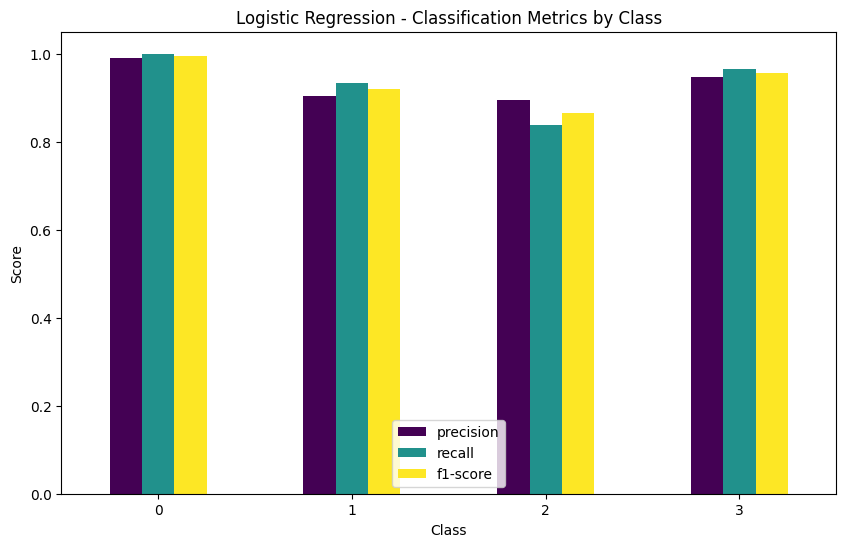

In [ ]:
# Classification Report
report = classification_report(y_val, y_val_pred_lr, output_dict=True)
report_df = pd.DataFrame(report).transpose()
report_df.drop(['accuracy', 'macro avg', 'weighted avg'], inplace=True)

# Plot classification metrics (precision, recall, f1-score) by class
report_df[['precision', 'recall', 'f1-score']].plot(
    kind='bar',
    figsize=(10, 6),
    colormap='viridis'
)
plt.title('Logistic Regression - Classification Metrics by Class')
plt.ylabel('Score')
plt.xlabel('Class')
plt.xticks(rotation=0)
plt.show()




<ipython-input-18-ba32d05d3fdf>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance, palette='viridis')


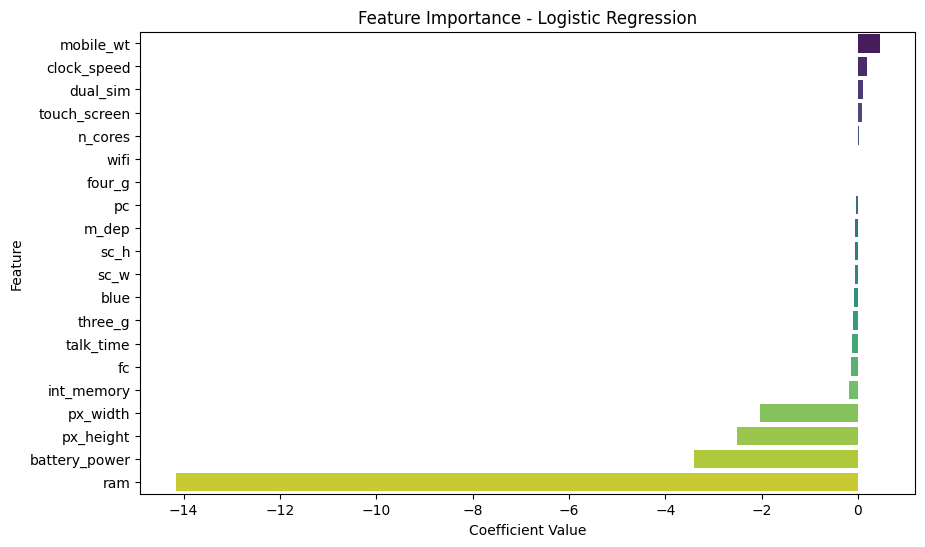

In [ ]:
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': log_reg.coef_[0]  # Coefficients for the first class
}).sort_values(by='Importance', ascending=False)

# Visualize
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance, palette='viridis')
plt.title('Feature Importance - Logistic Regression')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.show()


In [ ]:
# Preprocess the test data
df_test_processed, _ = preprocess_data(df_test, is_training=False, scaler=scaler)
# Ensure the test data has the same columns as the training data
df_test_processed = df_test_processed.reindex(columns=X_train.columns, fill_value=0)
# Make predictions on the test data
y_test_pred = log_reg.predict(df_test_processed)
# Save predictions to a CSV file
df_test['predicted_price_range'] = y_test_pred
df_test.to_csv('/content/test_predictions.csv', index=False)
print("Predictions saved to '/content/test_predictions.csv'")



Predictions saved to '/content/test_predictions.csv'


In [ ]:
# Display the first 10 predictions
print(df_test[['id', 'predicted_price_range']].head(10))

# Optionally, show 10 random predictions
print(f"\n\nrandom 10 predictions\n {df_test[['id', 'predicted_price_range']].sample(10)}")

   id  predicted_price_range
0   1                      2
1   2                      3
2   3                      2
3   4                      3
4   5                      1
5   6                      3
6   7                      3
7   8                      1
8   9                      3
9  10                      0


random 10 predictions
       id  predicted_price_range
594  595                      3
35    36                      1
623  624                      1
17    18                      1
869  870                      0
237  238                      0
232  233                      2
919  920                      2
542  543                      2
39    40                      1
